# Download climate data from ncep

In [151]:
import os
import xarray as xr 

os.chdir('/home/mmann1123/Downloads')
!wget "https://downloads.psl.noaa.gov/Datasets/ncep.reanalysis.derived/surface/air.mon.mean.nc"
# ! executes a shell command, here using wget to download in linux

--2021-10-27 23:03:00--  https://downloads.psl.noaa.gov/Datasets/ncep.reanalysis.derived/surface/air.mon.mean.nc
Resolving downloads.psl.noaa.gov (downloads.psl.noaa.gov)... 140.172.38.86
Connecting to downloads.psl.noaa.gov (downloads.psl.noaa.gov)|140.172.38.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27913427 (27M) [application/x-netcdf]
Saving to: ‘air.mon.mean.nc.5’

air.mon.mean.nc.5   100%[===================>]  26.62M  2.17MB/s    in 13s     

2021-10-27 23:03:14 (1.99 MB/s) - ‘air.mon.mean.nc.5’ saved [27913427/27913427]



# examine data structure

In [152]:
# open dataset
ds = xr.open_dataset('air.mon.mean.nc')
print(ds)

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 885)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2021-09-01
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    description:    Data from NCEP initialized reanalysis (4x/day).  These ar...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Thu May  4 20:11:16 2000: ncrcat -d time,0,623 /Datasets/...
    title:          monthly mean air.sig995 from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...


In [153]:
# view variable called air
print(ds.air)

<xarray.DataArray 'air' (time: 885, lat: 73, lon: 144)>
[9303120 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2021-09-01
Attributes:
    long_name:     Monthly Mean Air Temperature at sigma level 0.995
    valid_range:   [-2000.  2000.]
    units:         degC
    precision:     1
    var_desc:      Air Temperature
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Individual Obs
    dataset:       NCEP Reanalysis Derived Products
    actual_range:  [-73.78001  42.14595]


In [154]:
# look at time
print(ds.time)

<xarray.DataArray 'time' (time: 885)>
array(['1948-01-01T00:00:00.000000000', '1948-02-01T00:00:00.000000000',
       '1948-03-01T00:00:00.000000000', ..., '2021-07-01T00:00:00.000000000',
       '2021-08-01T00:00:00.000000000', '2021-09-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2021-09-01
Attributes:
    long_name:        Time
    delta_t:          0000-01-00 00:00:00
    avg_period:       0000-01-00 00:00:00
    prev_avg_period:  0000-00-01 00:00:00
    standard_name:    time
    axis:             T
    actual_range:     [1297320. 1943088.]


# Select Data

In [155]:
# select a single year of air temp data
print(ds.air.sel(time='1948-01-01'))

<xarray.DataArray 'air' (lat: 73, lon: 144)>
array([[-34.926773, -34.926773, -34.926773, ..., -34.926773, -34.926773,
        -34.926773],
       [-35.13935 , -35.129673, -35.12742 , ..., -35.188705, -35.170002,
        -35.14935 ],
       [-34.352573, -34.04226 , -33.768707, ..., -35.333866, -35.002903,
        -34.671288],
       ...,
       [-16.525156, -16.404509, -16.284832, ..., -16.795155, -16.737736,
        -16.643543],
       [-16.190313, -16.202248, -16.21677 , ..., -16.132574, -16.161928,
        -16.178377],
       [-17.697733, -17.697733, -17.697733, ..., -17.697733, -17.697733,
        -17.697733]], dtype=float32)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    time     datetime64[ns] 1948-01-01
Attributes:
    long_name:     Monthly Mean Air Temperature at sigma level 0.995
    valid_range:   [-2000.  2000.]
    units:         degC
    precision: 

In [168]:
# select a time period of air data
print(ds.air.sel(time=slice("2000-06-01", "2000-06-10")))

<xarray.DataArray 'air' (time: 1, lat: 73, lon: 144)>
array([[[-9.332018e-03, -9.332018e-03, ..., -9.332018e-03, -9.332018e-03],
        [ 2.690015e-01,  2.530031e-01, ...,  2.930056e-01,  2.793368e-01],
        ...,
        [-5.390633e+01, -5.420266e+01, ..., -5.326300e+01, -5.359800e+01],
        [-5.385533e+01, -5.385533e+01, ..., -5.385533e+01, -5.385533e+01]]],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 2000-06-01
Attributes:
    long_name:     Monthly Mean Air Temperature at sigma level 0.995
    valid_range:   [-2000.  2000.]
    units:         degC
    precision:     1
    var_desc:      Air Temperature
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Individual Obs
    dataset:       NCEP Reanalysis Derived Products
    actual_range:  [-73.78001  42.14595]


In [169]:
# see all years
print(ds.time.dt.year.head(20))

<xarray.DataArray 'year' (time: 20)>
array([1948, 1948, 1948, 1948, 1948, 1948, 1948, 1948, 1948, 1948, 1948,
       1948, 1949, 1949, 1949, 1949, 1949, 1949, 1949, 1949])
Coordinates:
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 1949-08-01


In [170]:
# see all months
print(ds.time.dt.month.head(20))

<xarray.DataArray 'month' (time: 20)>
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,
        6,  7,  8])
Coordinates:
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 1949-08-01


In [171]:
# select months jun, july
print(ds.time.sel(time=ds.time.dt.month.isin([6, 7])).head())

<xarray.DataArray 'time' (time: 5)>
array(['1948-06-01T00:00:00.000000000', '1948-07-01T00:00:00.000000000',
       '1949-06-01T00:00:00.000000000', '1949-07-01T00:00:00.000000000',
       '1950-06-01T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1948-06-01 1948-07-01 ... 1950-06-01
Attributes:
    long_name:        Time
    delta_t:          0000-01-00 00:00:00
    avg_period:       0000-01-00 00:00:00
    prev_avg_period:  0000-00-01 00:00:00
    standard_name:    time
    axis:             T
    actual_range:     [1297320. 1943088.]


In [160]:
# select months jun, july in two years
print(ds.time.sel(time=ds.time.dt.month.isin([6, 7]) & ds.time.dt.year.isin([1962,1973])))

<xarray.DataArray 'time' (time: 4)>
array(['1962-06-01T00:00:00.000000000', '1962-07-01T00:00:00.000000000',
       '1973-06-01T00:00:00.000000000', '1973-07-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1962-06-01 1962-07-01 1973-06-01 1973-07-01
Attributes:
    long_name:        Time
    delta_t:          0000-01-00 00:00:00
    avg_period:       0000-01-00 00:00:00
    prev_avg_period:  0000-00-01 00:00:00
    standard_name:    time
    axis:             T
    actual_range:     [1297320. 1943088.]


# Summarize by year month etc with groupby


<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, year: 74)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * year     (year) int64 1948 1949 1950 1951 1952 ... 2017 2018 2019 2020 2021
Data variables:
    air      (year, lat, lon) float32 -17.98 -17.98 -17.98 ... -47.03 -47.03


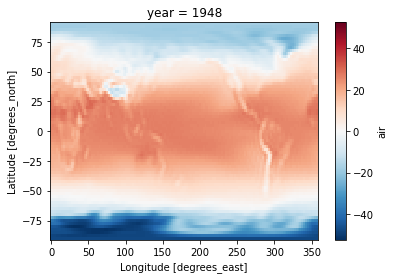

In [161]:
# get mean air temp across all years and then plot 
year_mean = ds.groupby('time.year').mean(dim='time')
print(year_mean)
year_mean.air.sel(year=1948).plot()

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, month: 12)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    air      (month, lat, lon) float32 -30.04 -30.04 -30.04 ... -22.15 -22.15


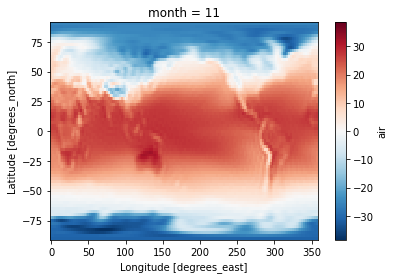

In [162]:
# get mean air temp across all months and then plot 
year_mean = ds.groupby('time.month').mean(dim='time')
print(year_mean)
year_mean.air.sel(month=11).plot()

# Calculate Anomolies 

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, year: 74)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * year     (year) int64 1948 1949 1950 1951 1952 ... 2017 2018 2019 2020 2021
Data variables:
    air      (year, lat, lon) float32 -0.02024 -0.02024 ... 0.05846 0.05846


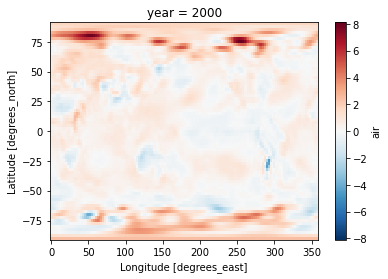

In [163]:
# calculate annual difference from base period
base_year_mn = ds.sel(time=slice("1948-01-01", "1978-01-01")).mean(dim='time')
base_year_anom = ds.groupby('time.year').mean(dim='time') - base_year_mn
print(base_year_anom)
base_year_anom.air.sel(year=2000).plot()

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 885)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2021-09-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 12 ... 11 12 1 2 3 4 5 6 7 8 9
Data variables:
    air      (time, lat, lon) float32 -4.889 -4.889 -4.889 ... 5.787 5.787 5.787


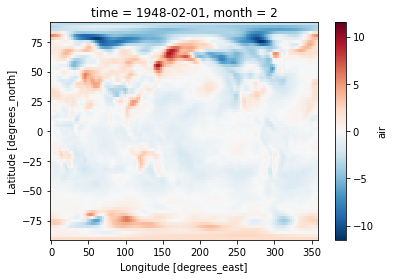

In [164]:
# calculate annual difference from base period
base_month_mn = ds.groupby('time.month').mean(dim='time')
base_month_anom = ds.groupby('time.month') - base_month_mn
print(base_month_anom)
base_month_anom.air[1].plot()

# Rolling Averages

In [165]:
print(ds.rolling(time=5).mean())

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 885)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2021-09-01
Data variables:
    air      (time, lat, lon) float64 nan nan nan nan ... -53.69 -53.69 -53.69
Attributes:
    description:    Data from NCEP initialized reanalysis (4x/day).  These ar...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Thu May  4 20:11:16 2000: ncrcat -d time,0,623 /Datasets/...
    title:          monthly mean air.sig995 from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...


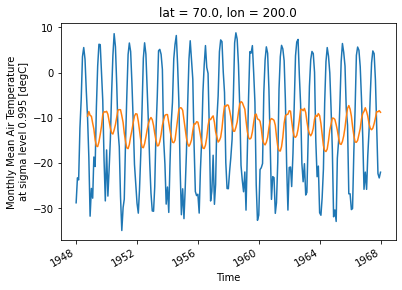

In [166]:
# lets see what we are doing by selecting data for one coordinate
air_ts = ds.air.sel(lon=200, lat=70,time=slice("1948-01-01", "1968-01-01"))
air_rolling_mn = air_ts.rolling(time=10).mean()

air_ts.plot()
air_rolling_mn.plot()

In [167]:
# looking at the data the 10th period holds mean of preceeding 10 years
print(air_rolling_mn)

<xarray.DataArray 'air' (time: 241)>
array([         nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,  -9.59728165,  -8.60003662,  -9.44618301,
        -9.63495712, -11.18369064, -12.44630356, -14.87247009,
       -16.18195343, -16.33189697, -15.29516449, -13.68238983,
       -11.82998962,  -9.27476425,  -8.64703217,  -8.70774155,
        -8.55148315,  -9.20409546, -10.61222382, -12.23352432,
       -13.32397461, -13.56926575, -12.68623428, -11.50029907,
        -9.82816467,  -8.2569397 ,  -8.18356094,  -8.19583435,
        -9.51641541, -11.02066956, -13.35018463, -15.23865051,
       -16.61468201, -16.78749084, -15.8774826 , -14.15264435,
       -12.75131149, -11.06737671,  -9.60810242,  -9.07854385,
        -9.16528549, -10.75154419, -12.80860901, -14.98890991,
       -16.43929749, -16.58751678, -15.69761505, -14.23509979,
       -12.57963409, -11.25114822, -10.35833893,  -9.91483917,
       -10.3947113

# Write Back to File

In [172]:
ds.rolling(time=5).mean().to_netcdf('./air_5yr_rolling.nc')